In [1]:
import os, shutil

In [2]:
base_dir = '/home/skhatter/Transfer_Learning/512_original/'
train_dir = '/home/skhatter/Transfer_Learning/512_original/train'
valid_dir = '/home/skhatter/Transfer_Learning/512_original/validation'

train_dam_dir = '/home/skhatter/Transfer_Learning/512_original/train/damaged'
train_undam_dir = '/home/skhatter/Transfer_Learning/512_original/train/undamaged'

valid_dam_dir = '/home/skhatter/Transfer_Learning/512_original/validation/damaged'
valid_undam_dir = '/home/skhatter/Transfer_Learning/512_original/validation/undamaged'

In [3]:
print('Total training damaged images', len(os.listdir(train_dam_dir)))
print('Total training undamaged images', len(os.listdir(train_undam_dir)))

print('Total validation damaged images', len(os.listdir(valid_dam_dir)))
print('Total validation undamaged images', len(os.listdir(valid_undam_dir)))

Total training damaged images 1501
Total training undamaged images 2541
Total validation damaged images 26
Total validation undamaged images 21


In [14]:
from keras import layers
from keras import models
from keras.applications import VGG19

In [15]:
conv_base = VGG19(weights = 'imagenet', include_top = False, input_shape=(512, 512, 3))
conv_base.summary()

80060416/80134624 [============================>.] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (Max

In [17]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 5

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,16,16,512 ))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(512, 512),
                                           batch_size=batch_size, class_mode='binary')
    i =0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 4040)
validation_features, validation_labels = extract_features(valid_dir, 45)    

Found 4040 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [18]:
train_features = np.reshape(train_features, (4040, 16*16*512))
validation_features = np.reshape(validation_features, (45, 16*16*512))

In [19]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=16*16*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

In [20]:
history = model.fit(train_features, train_labels, epochs=100, 
                    batch_size =5, 
                    validation_data=(validation_features, validation_labels))

Train on 4040 samples, validate on 45 samples
Epoch 1/100
4040/4040 [==============================] - 17s - loss: 0.6692 - acc: 0.6658 - val_loss: 0.6024 - val_acc: 0.7333
Epoch 2/100
4040/4040 [==============================] - 16s - loss: 0.4913 - acc: 0.7705 - val_loss: 0.5684 - val_acc: 0.7333
Epoch 3/100
4040/4040 [==============================] - 16s - loss: 0.4292 - acc: 0.8116 - val_loss: 0.4784 - val_acc: 0.7556
Epoch 4/100
4040/4040 [==============================] - 16s - loss: 0.3855 - acc: 0.8300 - val_loss: 0.4779 - val_acc: 0.7778
Epoch 5/100
4040/4040 [==============================] - 16s - loss: 0.3614 - acc: 0.8455 - val_loss: 0.4271 - val_acc: 0.8222
Epoch 6/100
4040/4040 [==============================] - 16s - loss: 0.3471 - acc: 0.8483 - val_loss: 0.3809 - val_acc: 0.8667
Epoch 7/100
4040/4040 [==============================] - 16s - loss: 0.3364 - acc: 0.8577 - val_loss: 0.4229 - val_acc: 0.7778
Epoch 8/100
4040/4040 [==============================] - 16s - lo

4040/4040 [==============================] - 16s - loss: 0.1911 - acc: 0.9426 - val_loss: 0.6203 - val_acc: 0.8444
Epoch 65/100
4040/4040 [==============================] - 16s - loss: 0.1951 - acc: 0.9490 - val_loss: 0.3142 - val_acc: 0.9556
Epoch 66/100
4040/4040 [==============================] - 16s - loss: 0.1855 - acc: 0.9478 - val_loss: 0.2890 - val_acc: 0.9556
Epoch 67/100
4040/4040 [==============================] - 16s - loss: 0.2050 - acc: 0.9446 - val_loss: 0.3575 - val_acc: 0.9556
Epoch 68/100
4040/4040 [==============================] - 16s - loss: 0.1714 - acc: 0.9510 - val_loss: 0.4346 - val_acc: 0.8889
Epoch 69/100
4040/4040 [==============================] - 16s - loss: 0.1722 - acc: 0.9557 - val_loss: 0.3233 - val_acc: 0.9556
Epoch 70/100
4040/4040 [==============================] - 16s - loss: 0.1730 - acc: 0.9502 - val_loss: 0.3906 - val_acc: 0.9111
Epoch 71/100
4040/4040 [==============================] - 16s - loss: 0.1857 - acc: 0.9507 - val_loss: 0.5717 - val_a

In [21]:
history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv3_vgg.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


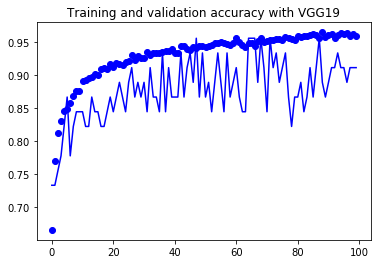

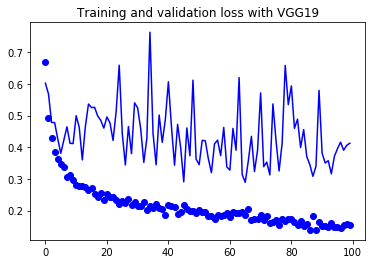

In [23]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy with VGG19')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss with VGG19')
plt.show()

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 33,554,945
Trainable params: 33,554,945
Non-trainable params: 0
_________________________________________________________________
